In [8]:
# Temel Kütüphaneler
import numpy as np
import pandas as pd

# Görselleştirme
import seaborn as sns # for plotting
import matplotlib.pyplot as plt

# Model Kurma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 

# Veri setini yükleme
df = pd.read_csv('processed.cleveland.csv')

# Eksik verileri "?" ile işaretlenmiş olarak kabul etme
df.replace("?", pd.NA, inplace=True)

# Eksik değerlerin sayısını hesaplama
missing_values = df.isnull().sum()

# Eksik değer içeren sütunları filtreleme
missing_columns = missing_values[missing_values > 0]

# Eksik değer içeren sütunları ve eksik değer sayılarını görüntüleme
print("Eksik değer içeren sütunlar ve eksik değer sayıları:")
print(missing_columns)


Eksik değer içeren sütunlar ve eksik değer sayıları:
ca      4
thal    2
dtype: int64


In [9]:
print(df.dtypes)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
target        int64
dtype: object


In [7]:
print(df['ca'].value_counts())
print(df['thal'].value_counts())


0    176
1     65
2     38
3     20
Name: ca, dtype: int64
3    166
7    117
6     18
Name: thal, dtype: int64


In [10]:
# Kategorik verileri sayısal verilere dönüştürme (Label Encoding)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))

# Eksik verileri içeren sütunları belirleme
missing_columns = df.columns[df.isnull().any()]
print(f"Eksik veri içeren sütunlar: {missing_columns}")

for target_column in missing_columns:
    print(f"{target_column} sütunundaki eksik değerler dolduruluyor...")
    # Eksik olmayan sütunları belirleme
    features_columns = df.columns[df.columns != target_column]
    
    # Eksik verileri içeren ve içermeyen satırları ayırma
    train_data = df[df[target_column].notna()]
    test_data = df[df[target_column].isna()]
    
    # Eğitim ve test setleri oluşturma
    X_train = train_data[features_columns]
    y_train = train_data[target_column].astype(int)
    X_test = test_data[features_columns]
    
    # Sınıflandırma modeli oluşturma ve eğitme
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Eksik verileri tahmin etme
    predicted_values = model.predict(X_test)
    
    # Eksik verileri doldurma
    df.loc[df[target_column].isna(), target_column] = predicted_values

# Doldurulmuş veri setini kaydetme
df.to_csv('doldurulmus_veri_seti.csv', index=False)

print("Eksik veriler başarıyla dolduruldu ve veri seti kaydedildi.")

Eksik veri içeren sütunlar: Index([], dtype='object')
Eksik veriler başarıyla dolduruldu ve veri seti kaydedildi.


In [11]:
df.head(303)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,2,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,2,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,2,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,0,1


In [12]:
# target sütununda 1'den büyük olan değerleri 1'e eşitle
df['target'] = np.where(df['target'] > 1, 1, df['target'])

# Güncellenmiş sütunu kontrol et
print(df['target'].value_counts())


0    164
1    139
Name: target, dtype: int64


In [13]:
# Dönüşüm sonrası sütunların veri tiplerini kontrol edin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int32  
 12  thal      303 non-null    int32  
 13  target    303 non-null    int64  
dtypes: float64(1), int32(2), int64(11)
memory usage: 30.9 KB


In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.716172,0.851485,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,0.970282,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,3.000000,1.000000


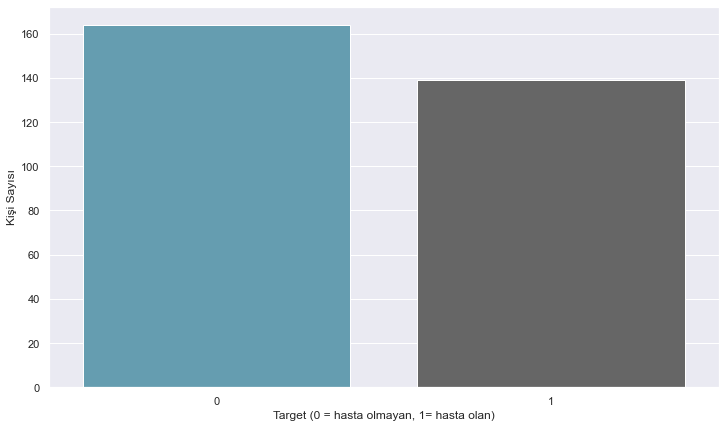

In [15]:
# seaborn
#Hasta olanlar ve olmayanların dağılımı
color = ["#58a3bc","#666666"]
plt.figure(figsize=(12,7))
sns.set()
sns.countplot(x="target",
              data=df,
              palette=color)
plt.ylabel("Kişi Sayısı")
plt.xlabel("Target (0 = hasta olmayan, 1= hasta olan)")



plt.savefig('Hastalık.png',transparent=True)
plt.show()

In [16]:
# Hastalığı olmayan ve olan hasta sayıları
countNoDisease = len(df[df.target == 0]) # hastalığı olmayanların sayısı
countHaveDisease = len(df[df.target == 1]) # hastalığı olanların sayısı

# Hedef sütununda başka değer olup olmadığını kontrol edelim
print("Hedef sütundaki benzersiz değerler:", df.target.unique())


Hedef sütundaki benzersiz değerler: [0 1]


In [17]:
countNoDisease = len(df[df.target == 0]) # hastalığı olmayanların sayısı
countHaveDisease = len(df[df.target == 1]) # hastalığı olanların sayısı

print("Kalp Rahatsızlığı olmayan hastaların sayısı:", countNoDisease)
print("Kalp Rahatsızlığı olan hastaların sayısı:", countHaveDisease)
print("Kalp Rahatsızlığı olmayan hastaların yüzdesi: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Kalp Rahatsızlığı olan hastaların yüzdesi: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))


Kalp Rahatsızlığı olmayan hastaların sayısı: 164
Kalp Rahatsızlığı olan hastaların sayısı: 139
Kalp Rahatsızlığı olmayan hastaların yüzdesi: 54.13%
Kalp Rahatsızlığı olan hastaların yüzdesi: 45.87%


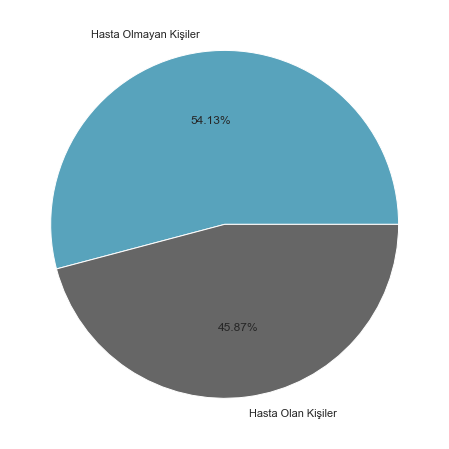

In [18]:
plt.figure(figsize=(8,8))
color = ["#58a3bc","#666666"]
plt.pie([countNoDisease,countHaveDisease],
        labels=["Hasta Olmayan Kişiler","Hasta Olan Kişiler"],
        colors=color,
        autopct='%1.2f%%');


plt.savefig('Hastalık1.png',transparent=True)

In [19]:
# Compare the target column with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,72,92
1,25,114


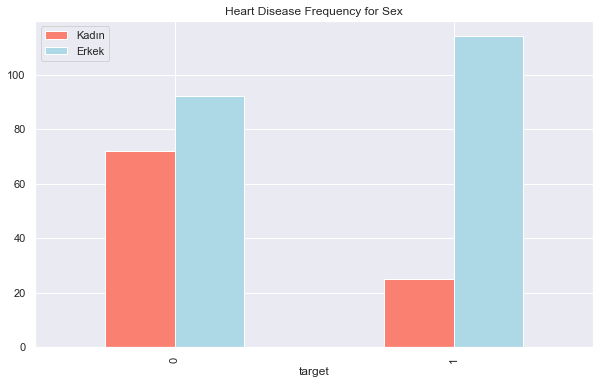

In [20]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", 
                                   figsize = (10, 6),
                                   color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Kadın","Erkek"])

In [21]:
#Hastalık durumuna göre diğer değişkenlerin ortalama değerleri
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.341463,0.396341
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.158273,1.388489


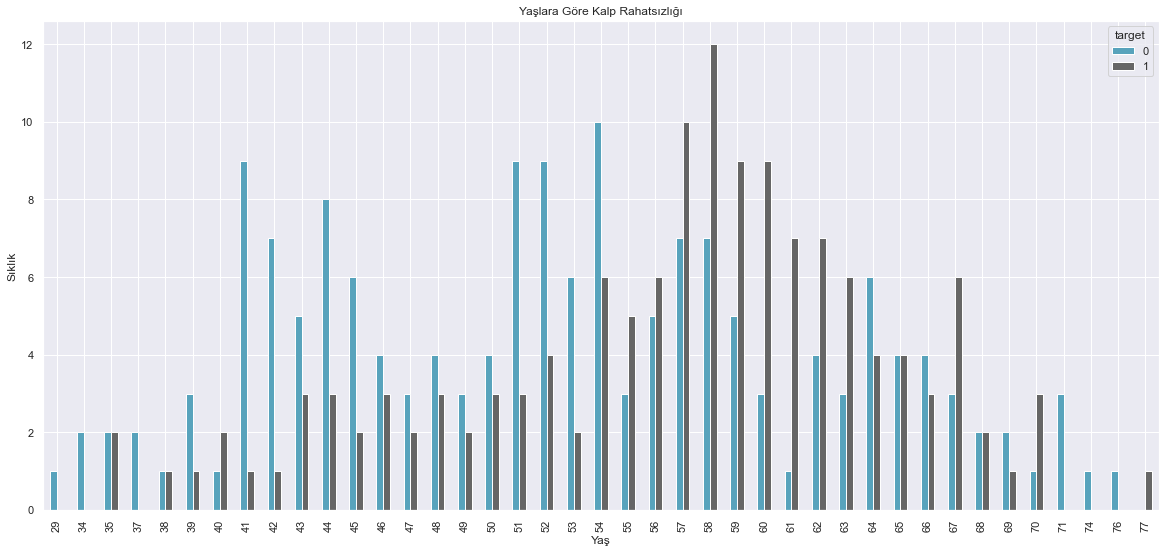

In [22]:
#Yaşlara göre Kalp Rahatsızlığı olup olmaması
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,9),color=color)
plt.title('Yaşlara Göre Kalp Rahatsızlığı')
plt.xlabel('Yaş')
plt.ylabel('Sıklık')
plt.savefig('heartDiseaseAndAges.png',transparent=True)
plt.show()

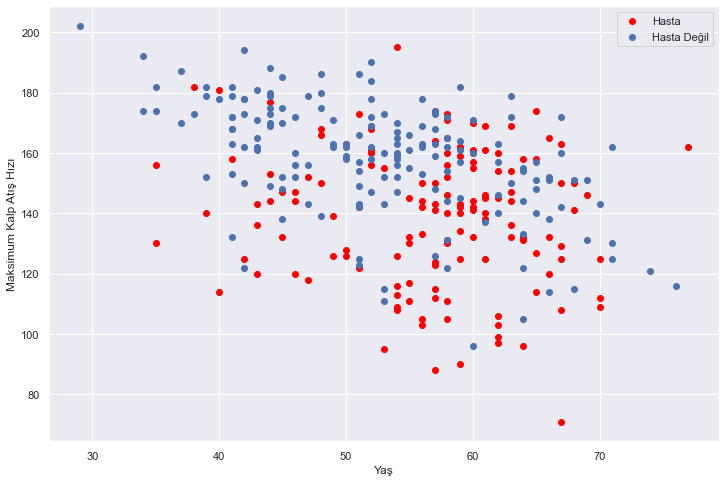

In [23]:
#Maksimum Kalp Atış Hızı ve Yaş Arasında Hastalık Dağılımı
plt.figure(figsize=(12,8))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Hasta", "Hasta Değil"])
plt.xlabel("Yaş")
plt.ylabel("Maksimum Kalp Atış Hızı")
plt.show()

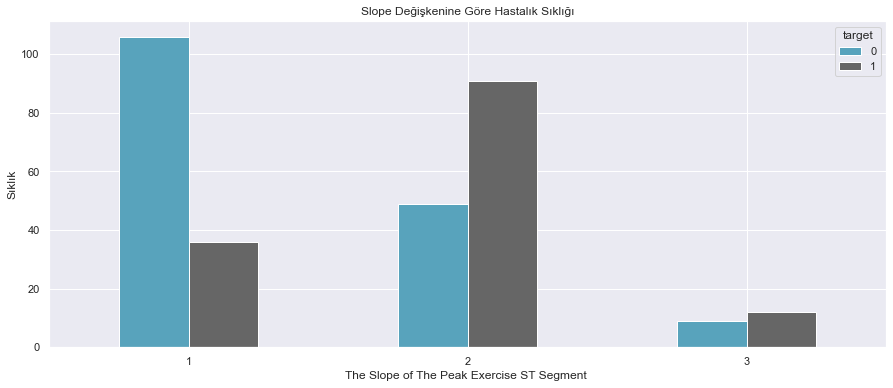

In [24]:
# slope ve target değişkenlerinin çapraz tablosunu oluşturma
crosstab = pd.crosstab(df['slope'], df['target'])

color = ["#58a3bc","#666666"]
crosstab.plot(kind="bar", figsize=(15,6), color=color)

plt.title('Slope Değişkenine Göre Hastalık Sıklığı')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation=0)
plt.ylabel('Sıklık')

plt.savefig('slope.png', transparent=True)

# Grafiği gösterme
plt.show()

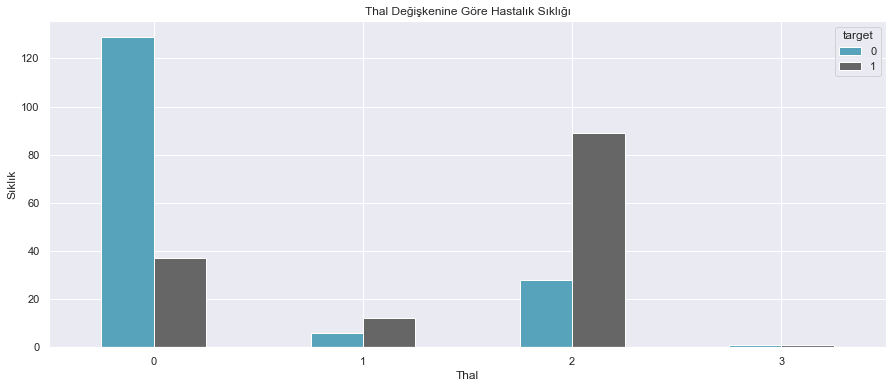

In [25]:
# thal ve target değişkenlerinin çapraz tablosunu oluşturma
crosstab = pd.crosstab(df['thal'], df['target'])

color = ["#58a3bc", "#666666"]
crosstab.plot(kind="bar", figsize=(15,6), color=color)

# Grafik başlıkları ve etiketleri
plt.title('Thal Değişkenine Göre Hastalık Sıklığı')
plt.xlabel('Thal')
plt.xticks(rotation=0)
plt.ylabel('Sıklık')

# Grafiği kaydetme
plt.savefig('thal.png', transparent=True)

# Grafiği gösterme
plt.show()

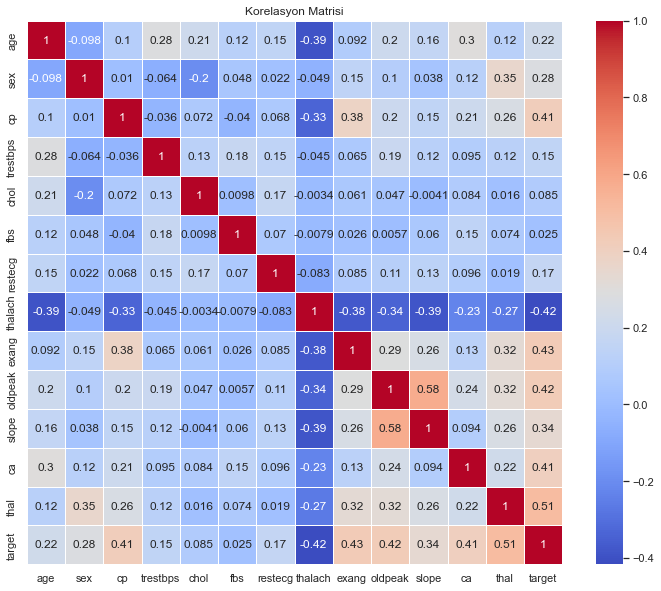

In [26]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Korelasyon Matrisi")
plt.savefig('heatmap.png', transparent=True)
plt.show()

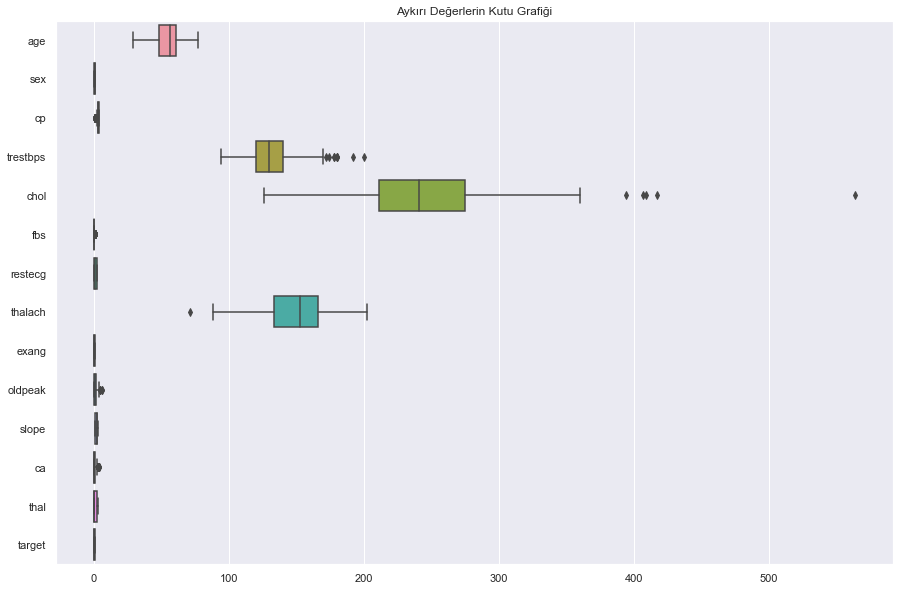

In [27]:
# Boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient="h")
plt.title("Aykırı Değerlerin Kutu Grafiği")
plt.savefig('boxplot.png', transparent=True)
plt.show()

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Öznitelik Seçimi
X = df.drop('target', axis=1)
y = df['target']
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)].tolist()
print("Seçilen Öznitelikler:", selected_features)

Seçilen Öznitelikler: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


In [30]:
#Kategorik Değişkenlerin Dönüştürülmesi

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


In [31]:
#Şimdi bu değişkenlerin değerlerine .uniqe() metodu yardımıyla bakalım.
#Eğer 0 - 1 haricinde değerler almışlarsa onları Nominal ve Ordinal olarak ayıralım.
#Nominal ölçek türüne sahip değişkenleri get_dummies() metoduyla tekrardan şekillendirelim.
print("""
Sex değişkeni eşsiz değerleri: {}
Cp değişkeni eşsiz değerleri: {}
Fbs değişkeni eşsiz değerleri: {}
Restecg değişkeni eşsiz değerleri: {}
Exang değişkeni eşsiz değerleri: {}
Slope değişkeni eşsiz değerleri: {}
Ca değişkeni eşsiz değerleri: {}
Thal değişkeni eşsiz değerleri: {}
""".format(df.sex.unique(),
           df.cp.unique(),
           df.fbs.unique(),
           df.restecg.unique(),
           df.exang.unique(),
           df.slope.unique(),
           df.ca.unique(),
           df.thal.unique()))


Sex değişkeni eşsiz değerleri: [1 0]
Cp değişkeni eşsiz değerleri: [1 4 3 2]
Fbs değişkeni eşsiz değerleri: [1 0]
Restecg değişkeni eşsiz değerleri: [2 0 1]
Exang değişkeni eşsiz değerleri: [0 1]
Slope değişkeni eşsiz değerleri: [3 2 1]
Ca değişkeni eşsiz değerleri: [0 3 2 1 4]
Thal değişkeni eşsiz değerleri: [1 0 2 3]



In [32]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int32
thal          int32
target        int64
dtype: object

In [33]:
#get_dummies() metodu yalnızca object veya category tipinde olan sütunları dönüştürdüğü için, 
#bu kategorik değişkenlerin dönüşüm öncesinde uygun veri tipine sahip olup olmadıklarını kontrol etmek ve gerektiğinde dönüştürmek önemlidir.
df.cp = pd.Categorical(df.cp)
df.restecg = pd.Categorical(df.restecg)
df.slope = pd.Categorical(df.slope)
df.ca = pd.Categorical(df.ca)
df.thal = pd.Categorical(df.thal)

df.dtypes

age            int64
sex            int64
cp          category
trestbps       int64
chol           int64
fbs            int64
restecg     category
thalach        int64
exang          int64
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [34]:
df = pd.get_dummies(df, drop_first=True)

In [35]:
print("Yeni sütun adları:")
print(df.columns)

Yeni sütun adları:
Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_2', 'cp_3', 'cp_4', 'restecg_1', 'restecg_2', 'slope_2',
       'slope_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')


In [36]:
df=df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_2', 'cp_3', 'cp_4', 'restecg_1', 'restecg_2', 'slope_2',
       'slope_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3']]

In [37]:
# Son hali
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2,...,restecg_2,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,1,0,0,0,0,1,0,0
1,67,1,160,286,0,108,1,1.5,1,0,...,1,1,0,0,0,1,0,0,0,0
2,67,1,120,229,0,129,1,2.6,1,0,...,1,1,0,0,1,0,0,0,1,0
3,37,1,130,250,0,187,0,3.5,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,0,0,0,0,0


In [38]:
#modeli uygulamaya geçiyoruz
#Bu aşamada %80 eğitim ve %20 test olarak veri setimizi rassal olarak ayırıyoruz.
print("**LOGISTIC REGRESSION**")

X_train, X_test, y_train, y_test = train_test_split(
                                   df.drop('target', axis=1), # target hariç veri setinin tamamı X
                                   df['target'], # target Y
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("MODEL DOĞRULUĞU {:.2f}%".format(lr.score(X_test,y_test)*100))

**LOGISTIC REGRESSION**
MODEL DOĞRULUĞU 90.16%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#Normalizasyon işlemi
print("**NORMALLEŞTİRME**")
X = df.drop('target',axis=1) # X
y = df.target # y

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled)
X_normalized.head()

**NORMALLEŞTİRME**


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.791667,1.0,0.622642,0.365297,0.0,0.282443,1.0,0.241935,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.791667,1.0,0.245283,0.235160,0.0,0.442748,1.0,0.419355,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_score = lr.score(X_test,y_test)
print("Test Accuracy {:.2f}%".format(lr_score*100))

Test Accuracy 90.16%


In [41]:
print("**KNN**")
#K-Nearest Neighbour (KNN) Classification
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

knn_score = knn.score(X_test, y_test)
print("{} NN Score: {:.2f}%".format(knn.n_neighbors, knn_score*100))

**KNN**
2 NN Score: 73.77%


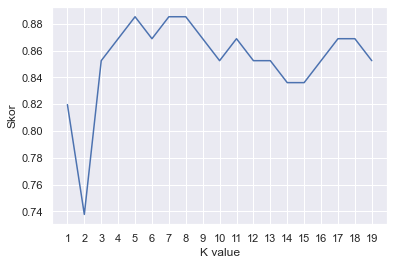

Maximum KNN Score is 88.52%


In [42]:
#En iyi n_neighbors değerini bulma
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

sns.set()    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Skor")
plt.savefig('kvalue.png',transparent=True)
plt.show()

knn_score = max(scoreList)
print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

In [43]:
print("**SVM**")
#Support Vector Machine (SVM) Algorithm
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test,y_test)
print("Test doğruluğu: {:.2f}%".format(svm_score*100))

**SVM**
Test doğruluğu: 88.52%


In [44]:
print("**Naive Bayes Algorithm**")
#Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_score = nb.score(X_test,y_test)
print("Test Doğruluğu {:.2f}%".format(nb_score*100))

**Naive Bayes Algorithm**
Test Doğruluğu 85.25%


In [45]:
print("**Karar Ağacı Algoritması**")
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_score = dtc.score(X_test, y_test)
print("Test doğruluğu {:.2f}%".format(dtc_score*100))

**Karar Ağacı Algoritması**
Test doğruluğu 75.41%


In [46]:
print("** Random Forest Classification**")
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
print("Test doğruluğu : {:.2f}%".format(rf_score*100))

** Random Forest Classification**
Test doğruluğu : 83.61%


In [47]:
methods_accuracy = {
    "Logistic Regression":lr_score,
    "KNN" : knn_score,
    "SVM" : svm_score,
    "Naive Bayes" : nb_score,
    "Decision Tree" : dtc_score,
    "Random Forest" : rf_score
}

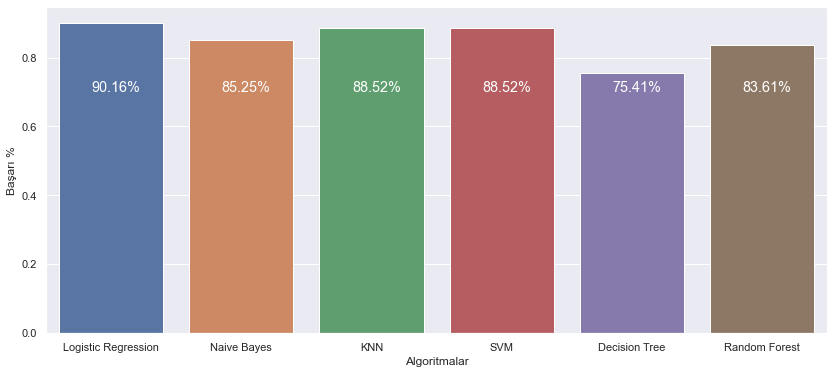

In [48]:
methods = ["Logistic Regression","Naive Bayes", "KNN", "SVM", "Decision Tree", "Random Forest"]
accuracy = [lr_score, nb_score, knn_score, svm_score, dtc_score, rf_score]

sns.set()
plt.figure(figsize=(14,6))
plt.ylabel("Başarı %")
plt.xlabel("Algoritmalar")
sns.barplot(x=methods, y=accuracy, palette="deep")

# Kırılımlar Üzerine Değerlerini Yazmak
for line in range(len(methods)):
     plt.text(line-0.15, # x
              0.70, # y
             "{:.2f}%".format(accuracy[line]*100), # yazdırılacak değer
             horizontalalignment='left',
              size='large',
             color="white",
             )

        
plt.savefig('karşılaştır.png',transparent=True)

        
plt.show()

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# 1. Veri setini yükleme ve eğitim-test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Farklı modellerin ve hiperparametrelerin denenmesi
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier()
}

# 3. Çapraz doğrulama ile model performansının değerlendirilmesi
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Mean Accuracy: {scores.mean()}")

# 4. En iyi modelin seçilmesi
best_model = None
best_score = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_score:
        best_model = model
        best_score = accuracy

print(f"Best Model: {best_model}, Test Accuracy: {best_score}")

# 5. Metriklerin değerlendirilmesi
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, ROC AUC: {roc_auc}")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Cross-Validation Mean Accuracy: 0.8221938775510204
SVM Cross-Validation Mean Accuracy: 0.6318877551020408
Decision Tree Cross-Validation Mean Accuracy: 0.6982142857142857
KNN Cross-Validation Mean Accuracy: 0.6364795918367347
Naive Bayes Cross-Validation Mean Accuracy: 0.7312925170068028
Random Forest Cross-Validation Mean Accuracy: 0.7892857142857144
Best Model: RandomForestClassifier(), Test Accuracy: 0.8852459016393442
Precision: 0.9310344827586207, Recall: 0.84375, F1 Score: 0.8852459016393444, ROC AUC: 0.8873922413793103


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
